# 1. Reading and Understanding the data

#### Importing all required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import datetime
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")

#### Loading the data set

In [4]:
try:
    df = pd.read_csv('day.csv')
    df.head() 
except FileNotFoundError:
    print('Please make sure that the dataset csv file is present in the same path as this notebook!!!')

#### Checking the shape of the data frame

In [5]:
df.shape

(730, 16)

#### Describe the columns

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Getting column info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Checking for null values

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### There are no null columns. Rename few columns for better readability

In [9]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
df['instant'].value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

##### Instant column looks like an Index type column which is not useful in model building. This can be dropped

In [11]:
df.drop(['instant'], axis=1 , inplace=True)
df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Looking at dteday column, we can see that all the attributes of date except for day are comfortably covered under month & year column. So we will extract the date from the dteday. We will also rename the dteday column to 'date'

In [12]:
df['dteday'] = df['dteday'].apply(lambda x: int(x.split('-')[0]))
# Rename dteday column to date
df = df.rename(columns={"dteday": "date"})

In [13]:
df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### cnt seems to be break up of casual and registered. So keeping casual and registerated variable makes model complicated. So, we can drop it.

In [14]:
df.drop(['casual','registered'],axis=1,inplace=True)

##### By looking at the data, we can say season,mnth,holiday,weekday,weathersit are categorical variables, so better replace with more meaningful name as per data dictionary. 
##### Year column consist of 2 values with 0 corresponding to 2018 & 1 corresponding to 2019. We will keep this values as it is, because normalising column consisting of only 0 & 1 will have no effect. 
##### For weather situation, we will consider small acronyms instead of large names given in data dictionary 1: clear, 2: mist, 3: light, 4: heavy

In [15]:
df.season = df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})  
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})

df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Checking the datatype of the variable again after mapping values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   year        730 non-null    int64  
 3   month       730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  humidity    730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


#### Check for duplicates

In [17]:

df_copy = df
df_copy.drop_duplicates(inplace=True)
print('Shape of df_copy :',df_copy.shape)
print('Shape of df: ', df.shape)

Shape of df_copy : (730, 13)
Shape of df:  (730, 13)


##### There are no duplicates in the data set

# 2. EDA and Visualization on the data set

#### Segregating the columns

In [18]:

categorical_columns = ['season','year','month','holiday', 'weekday','workingday','weathersit']
numerical_columns = ['temp', 'atemp' , 'humidity' , 'windspeed']

#### Loop through all categorical columns and create box plot for each column

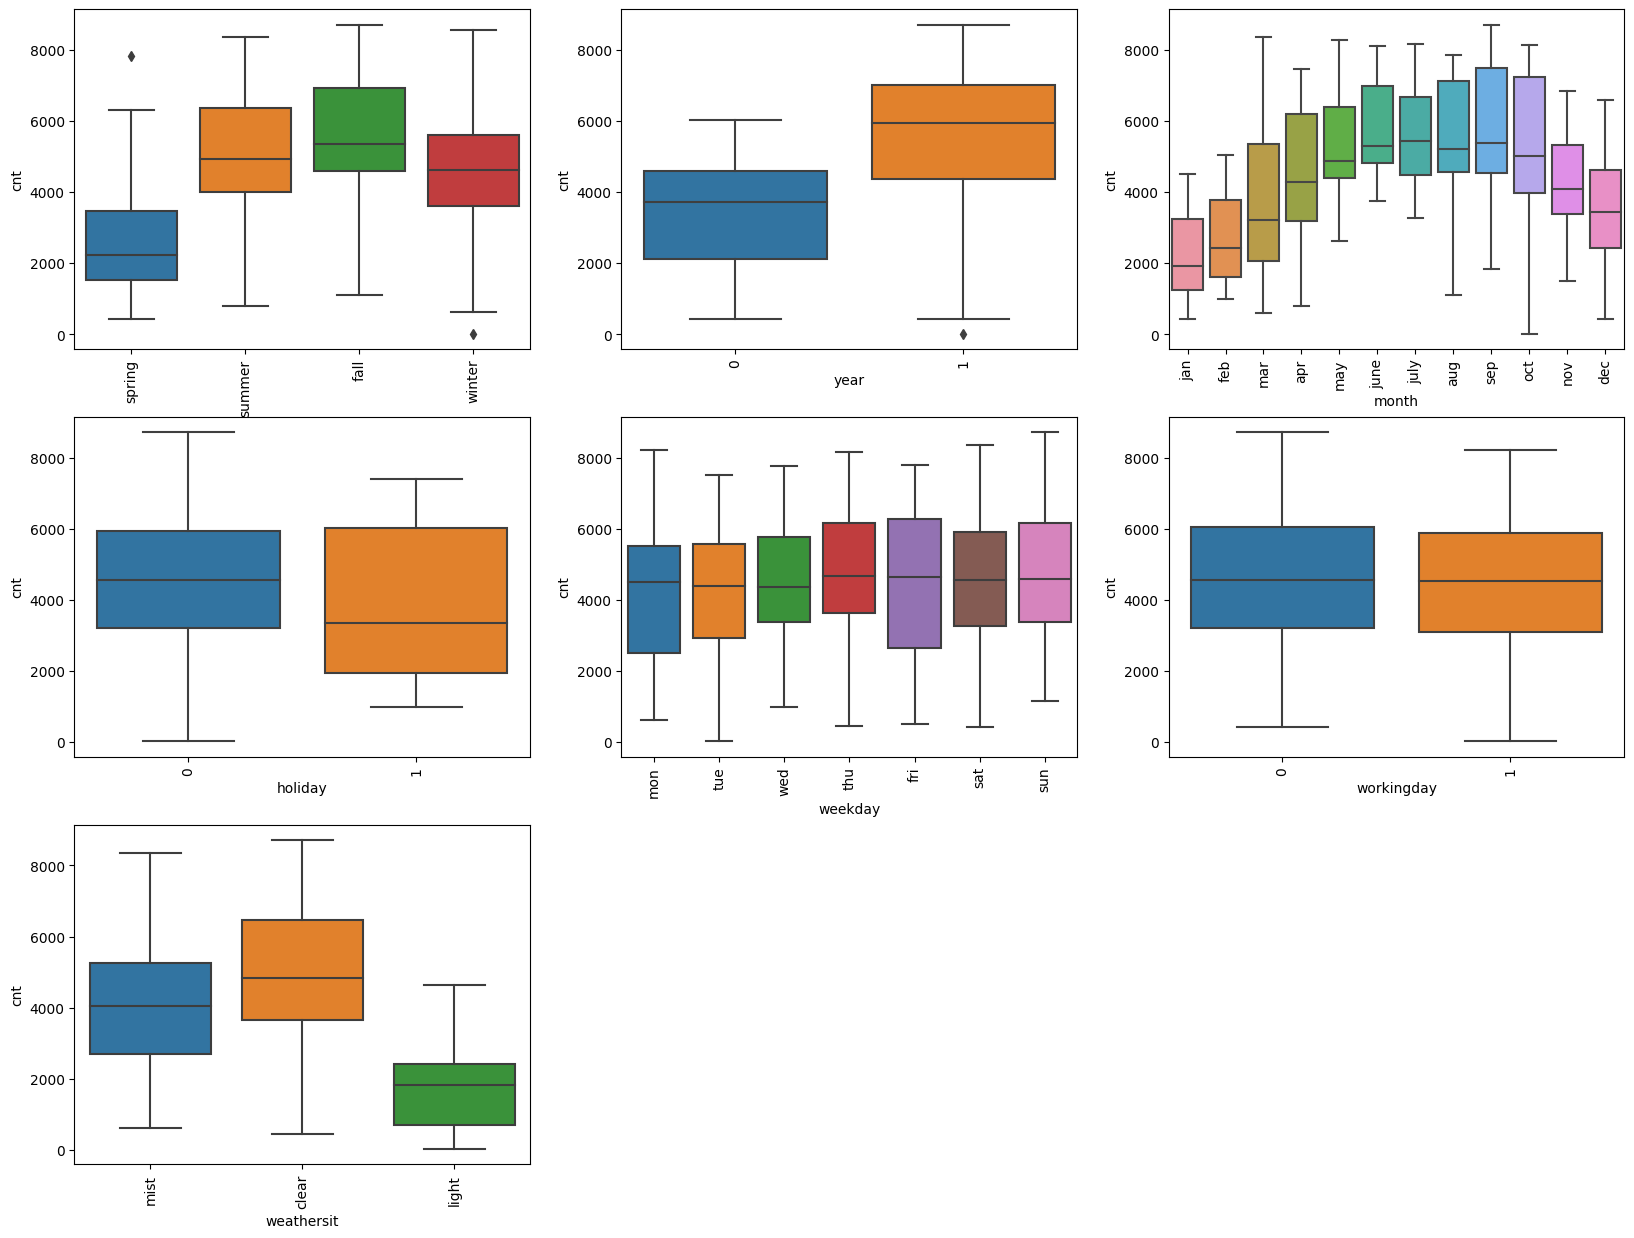

In [19]:

plt.figure(figsize=(20, 15))
for i,j in enumerate(categorical_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = j, y = 'cnt', data = df)
    plt.xticks(rotation='vertical')
plt.show()

From the above plots, we can infer that:
1. For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring .
2. Target variable is more in month june to october
3. The year 2019 had a higher count of users as compared to the year 2018
4. People prefer to rent bike when the sky is clear or few clouds
5. The bike demand is almost constant throughout the week.

#### Let's do the Bar plotting yearwise

In [20]:

def bar_categorical(column):
    plt.figure(figsize=(20, 15))
    for i,j in enumerate(column):
        plt.subplot(3,3,i+1)
        sns.barplot(x = j, y = 'cnt', hue='year', palette='Set1', data = df)
        plt.xticks(rotation='vertical')
        plt.legend(title='year', loc='upper left', labels=['2018', '2019'] ,fontsize="10" ,labelcolor = ['darkred','blue'])
    plt.show()


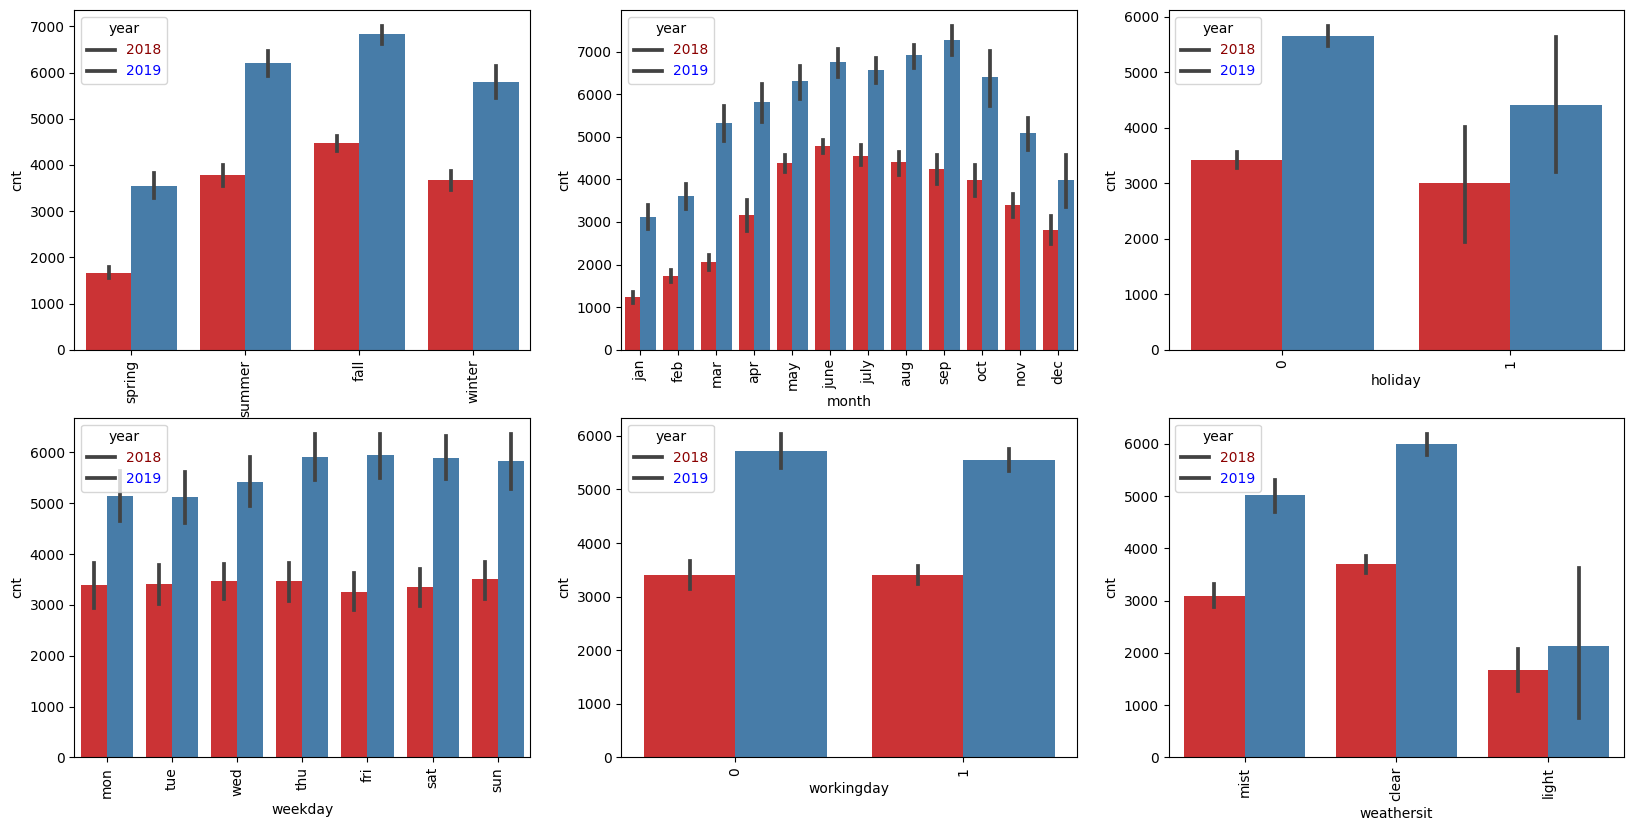

In [21]:
columns = ['season','month','holiday', 'weekday','workingday','weathersit']
bar_categorical(columns)

From the above plots, we can infer:
1. Fall season seems to have more renting of bike and the users have increased from 2018 to 2019.
2. The users are more in month June, July, Aug ,Sep and the count has increase from 2018 to 2019.
3. Booking seems to be almost equal either on a working day or a non-working day. But, the count has increased from 2018 to 2019.
4. Thu, Fri, Sat and Sun have more number of users as compared to the start of the week.
5. People prefer to rent bike when the weather is clear or has few clouds

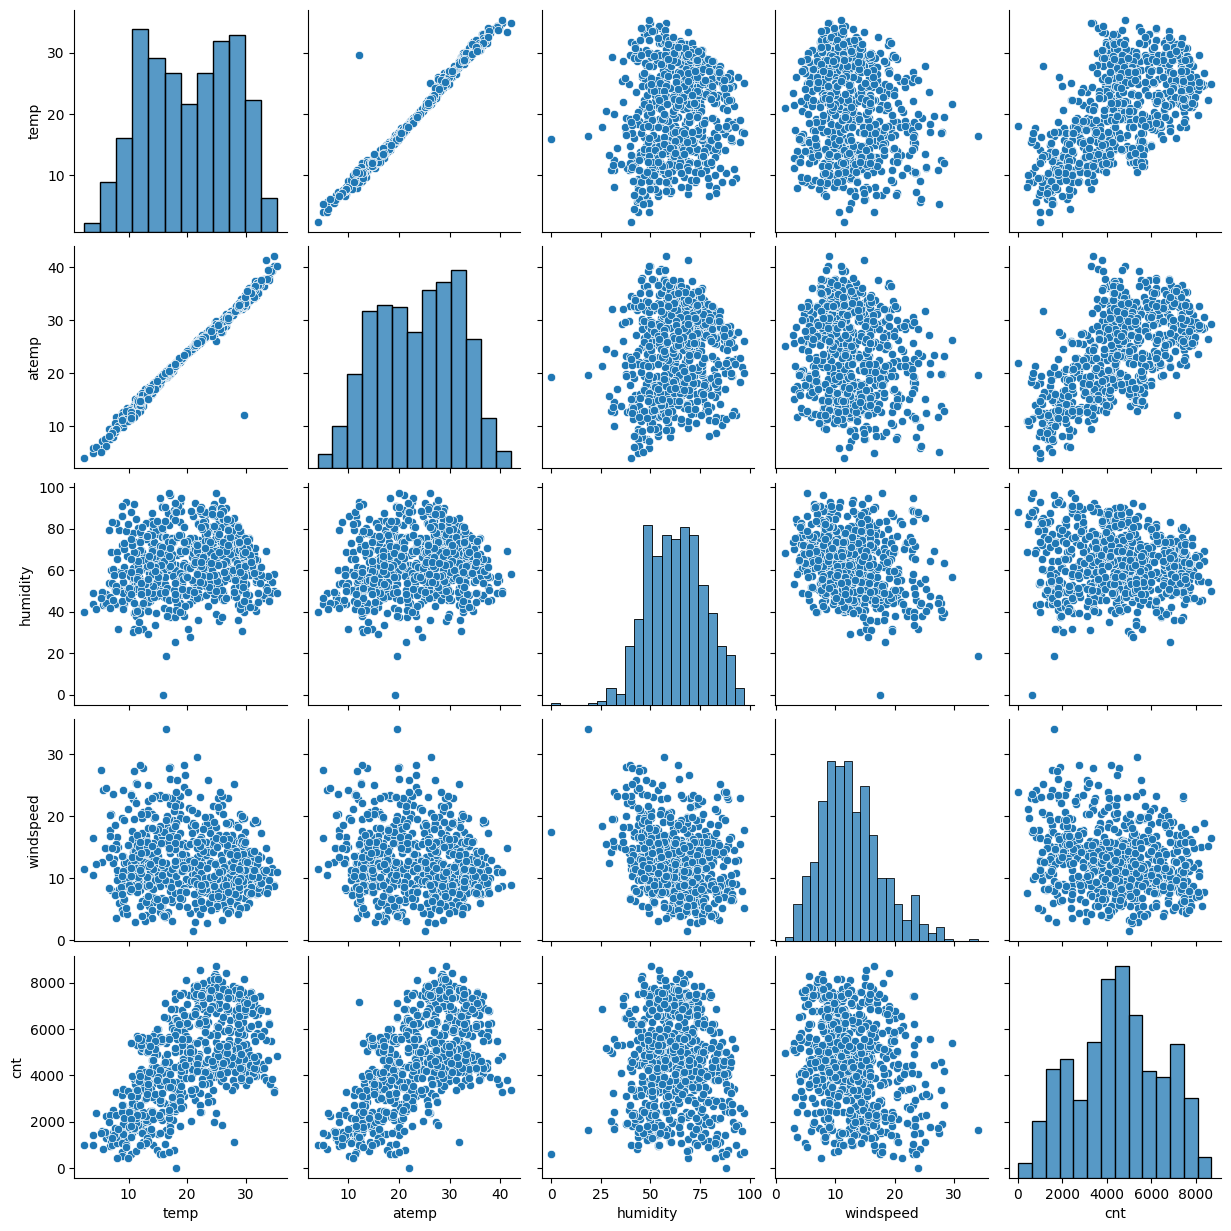

In [22]:
# Analysing numerical variables
# ploting pair plot for numerical variable
sns.pairplot(df, vars=['temp','atemp','humidity','windspeed',"cnt"])
plt.show()

##### From the pair plot, we can see that humidity and windspeed has gaps in distribution, Lets check them in detail

#### Check humidity column

In [23]:
df.humidity.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: humidity, dtype: float64

Text(0.5, 0, 'Humidity')

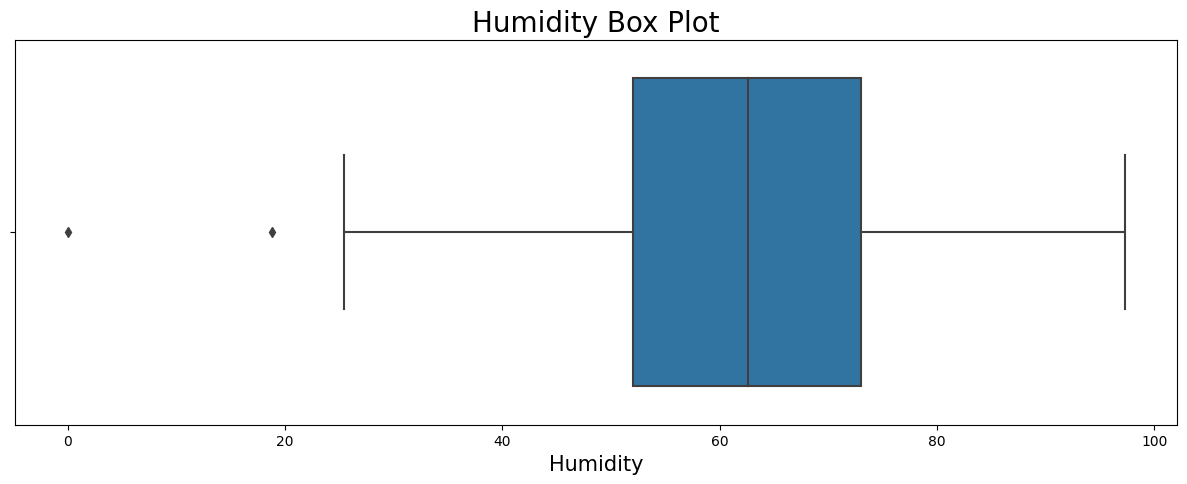

In [24]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='humidity')
plt.title('Humidity Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Humidity', fontdict={'fontsize': 15})

In [25]:
df[df['humidity'] == 0]

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
68,10,spring,0,mar,0,sat,0,light,15.952731,19.2834,0.0,17.545759,623


##### To check if this a typo or invalid data from source, we will pick 20% of values prior to specific date & 20% of values after the specific date and generate a plot to check the behaviour

In [26]:
humidity_check_df = df[(df.index > int(69*0.8)) & (df.index < int(69*1.2))]
humidity_check_df

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
56,26,spring,0,feb,0,mon,1,clear,11.582500,14.10960,53.7917,12.500257,1969
57,27,spring,0,feb,0,tue,1,clear,14.082598,17.55545,68.0000,8.391616,2402
58,28,spring,0,feb,0,wed,1,mist,16.698193,20.00590,87.6364,19.408962,1446
59,1,spring,0,mar,0,thu,1,clear,10.933347,13.19395,53.5000,14.500475,1851
60,2,spring,0,mar,0,fri,1,clear,13.735000,16.00355,44.9583,20.624811,2134
61,3,spring,0,mar,0,sat,0,clear,8.131653,10.00665,31.8333,15.125518,1685
62,4,spring,0,mar,0,sun,0,mist,10.728347,12.78395,61.0417,13.624182,1944
63,5,spring,0,mar,0,mon,1,mist,15.750847,18.93895,78.9167,16.875357,2077
64,6,spring,0,mar,0,tue,1,mist,15.437402,18.31260,94.8261,23.000229,605
65,7,spring,0,mar,0,wed,1,clear,10.731299,11.92305,55.1304,22.870584,1872


##### The value of humidity as 0 should be adjusted as humidity if 0 is an outlier.
##### We can take numerical mean of all the records before and after this value upto a specifc range making to make sure there is no abrupt change in the season


#### Imputing mean value at zero humidity level

In [27]:
mean_value = humidity_check_df.humidity.mean()
mean_value

59.137907692307685

In [28]:
df.at[int(df[df['humidity'] == 0.0].humidity.index.values), "humidity"] = mean_value

#### Checking if the imputed value is present or not

In [29]:
df[df.humidity < 10]

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt


In [30]:
humidity_check_post_df = df[(df.index > int(69*0.8)) & (df.index < int(69*1.2))]
humidity_check_post_df

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
56,26,spring,0,feb,0,mon,1,clear,11.582500,14.10960,53.791700,12.500257,1969
57,27,spring,0,feb,0,tue,1,clear,14.082598,17.55545,68.000000,8.391616,2402
58,28,spring,0,feb,0,wed,1,mist,16.698193,20.00590,87.636400,19.408962,1446
59,1,spring,0,mar,0,thu,1,clear,10.933347,13.19395,53.500000,14.500475,1851
60,2,spring,0,mar,0,fri,1,clear,13.735000,16.00355,44.958300,20.624811,2134
61,3,spring,0,mar,0,sat,0,clear,8.131653,10.00665,31.833300,15.125518,1685
62,4,spring,0,mar,0,sun,0,mist,10.728347,12.78395,61.041700,13.624182,1944
63,5,spring,0,mar,0,mon,1,mist,15.750847,18.93895,78.916700,16.875357,2077
64,6,spring,0,mar,0,tue,1,mist,15.437402,18.31260,94.826100,23.000229,605
65,7,spring,0,mar,0,wed,1,clear,10.731299,11.92305,55.130400,22.870584,1872


#### Checking Windspeed column

In [31]:
df.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

##### Wind speed seems to be in valid range, hence we can proceed ahead with this column without dropping / changing any records

#### Plotting the heatmap for checking correlation 

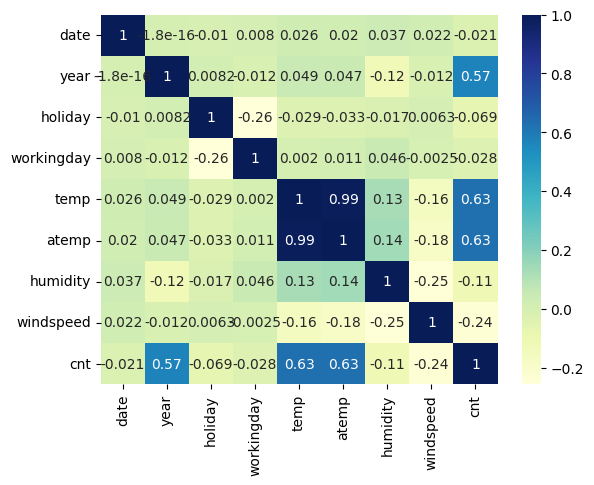

In [32]:
 
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above plots, we can infer that:
1. The coorelation between temp and atemp is very high 0.99. So we ignore 1 variable during RFE method.
2. The coreation between cnt with year and temp is also pretty good.

# 3. Preparing the data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   year        730 non-null    int64  
 3   month       730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  humidity    730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 96.0+ KB


In [34]:
df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Create Dummy Variable for season, month, weekday, weathersit

In [35]:
df_seasons = pd.get_dummies(df.season,drop_first=True)
df_months = pd.get_dummies(df.month,drop_first=True)
df_weekdays = pd.get_dummies(df.weekday,drop_first=True)
df_weathersit = pd.get_dummies(df.weathersit,drop_first=True)

In [36]:
print(df_seasons)
print(df_months)
print(df_weekdays)
print(df_weathersit)

     spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]
     aug  dec  feb  jan  july  june  mar  may  nov  oct  sep
0      0    0    0    1     0     0    0    0    0    0    0
1      0    0    0    1     0     0    0    0    0    0    0
2      0    0    0    1     0     0    0    0    0    0    0
3      0    0    0    1     0     0    0    0    0    0    0
4      0    0    0    1     0     0    0    0    0    0    0
..   ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...
725    0    1    0    0     0     0    0    0    0    0    0
726    0    1    0    0     0     0    0    0    0    0    0
727    0    1    0    0     0     0    0    0    0    0    0
728    0    1    0    0     0 

#### Concating all the dummy dataframes to the original data

In [37]:
df = pd.concat([df,df_seasons,df_months,df_weekdays,df_weathersit],axis=1)
df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,...,oct,sep,mon,sat,sun,thu,tue,wed,light,mist
0,1,spring,0,jan,0,mon,1,mist,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,1
1,2,spring,0,jan,0,tue,1,mist,14.902598,17.68695,...,0,0,0,0,0,0,1,0,0,1
2,3,spring,0,jan,0,wed,1,clear,8.050924,9.47025,...,0,0,0,0,0,0,0,1,0,0
3,4,spring,0,jan,0,thu,1,clear,8.200000,10.60610,...,0,0,0,0,0,1,0,0,0,0
4,5,spring,0,jan,0,fri,1,clear,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   season      730 non-null    object 
 2   year        730 non-null    int64  
 3   month       730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  humidity    730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
 13  spring      730 non-null    uint8  
 14  summer      730 non-null    uint8  
 15  winter      730 non-null    uint8  
 16  aug         730 non-null    uint8  
 17  dec         730 non-null    uint8  
 18  feb         730 non-null    uint8  
 19  jan         730 non-null    u

#### Dropping season, month, weekday, weathersit columns as we have already created dummy variable out of it.

In [39]:
df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
df.head()

,date,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,light,mist
0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,1
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    int64  
 1   year        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   temp        730 non-null    float64
 5   atemp       730 non-null    float64
 6   humidity    730 non-null    float64
 7   windspeed   730 non-null    float64
 8   cnt         730 non-null    int64  
 9   spring      730 non-null    uint8  
 10  summer      730 non-null    uint8  
 11  winter      730 non-null    uint8  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  july        730 non-null    uint8  
 17  june        730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

# 4. Split dataset into training and test data

#### Splitting dataframe into test and train
#### We need same row for test and train data respectively

In [41]:
np.random.seed(0)
data_train, data_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(data_train.head())
print(data_test.head())
print('Shape of data: ', data_train.shape)

     date  year  holiday  workingday       temp    atemp  humidity  windspeed  \
653    16     1        0           1  19.201653  23.0423   55.8333  12.208807   
576    31     1        0           1  29.246653  33.1448   70.4167  11.083475   
426     3     1        0           0  16.980847  20.6746   62.1250  10.792293   
728    30     1        0           1  10.489153  11.5850   48.3333  23.500518   
482    28     1        0           0  15.443347  18.8752   48.9583   8.708325   

      cnt  spring  ...  oct  sep  mon  sat  sun  thu  tue  wed  light  mist  
653  7534       0  ...    1    0    0    0    0    0    0    1      0     0  
576  7216       0  ...    0    0    0    0    0    0    0    1      0     0  
426  4066       1  ...    0    0    0    0    1    0    0    0      0     1  
728  1796       1  ...    0    0    1    0    0    0    0    0      0     0  
482  4220       0  ...    0    0    0    0    1    0    0    0      0     1  

[5 rows x 31 columns]
     date  year  holid

#### Scaling the numerical variable

##### Using the minmaxscaler for scaling the numerical variables

In [42]:
scaler = MinMaxScaler()

In [43]:
df.columns

Index(['date', 'year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'light', 'mist'],
      dtype='object')

In [44]:
numerical_variables = ['temp', 'atemp', 'humidity', 'windspeed' ,'cnt']
data_train[numerical_variables] = scaler.fit_transform(data_train[numerical_variables])

In [45]:
data_train.head()

,date,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,light,mist
653,16,1,0,1,0.509887,0.501133,0.473375,0.300794,0.864243,0,...,1,0,0,0,0,0,0,1,0,0
576,31,1,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,0,...,0,0,0,0,0,0,0,1,0,0
426,3,1,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,1,...,0,0,0,0,1,0,0,0,0,1
728,30,1,0,1,0.245101,0.200348,0.377528,0.663106,0.204096,1,...,0,0,1,0,0,0,0,0,0,0
482,28,1,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,0,...,0,0,0,0,1,0,0,0,0,1


#### Create X and y variables

In [46]:
y_train = data_train.pop('cnt')
X_train = data_train

In [47]:
print('X_Train:\n', X_train.head())
print('\ny_Train: \n', y_train.head())

X_Train:
      date  year  holiday  workingday      temp     atemp  humidity  windspeed  \
653    16     1        0           1  0.509887  0.501133  0.473375   0.300794   
576    31     1        0           1  0.815169  0.766351  0.659744   0.264686   
426     3     1        0           0  0.442393  0.438975  0.553780   0.255342   
728    30     1        0           1  0.245101  0.200348  0.377528   0.663106   
482    28     1        0           0  0.395666  0.391735  0.385516   0.188475   

     spring  summer  ...  oct  sep  mon  sat  sun  thu  tue  wed  light  mist  
653       0       0  ...    1    0    0    0    0    0    0    1      0     0  
576       0       0  ...    0    0    0    0    0    0    0    1      0     0  
426       1       0  ...    0    0    0    0    1    0    0    0      0     1  
728       1       0  ...    0    0    1    0    0    0    0    0      0     0  
482       0       1  ...    0    0    0    0    1    0    0    0      0     1  

[5 rows x 30 columns]


#### Analyze correlation between these variables

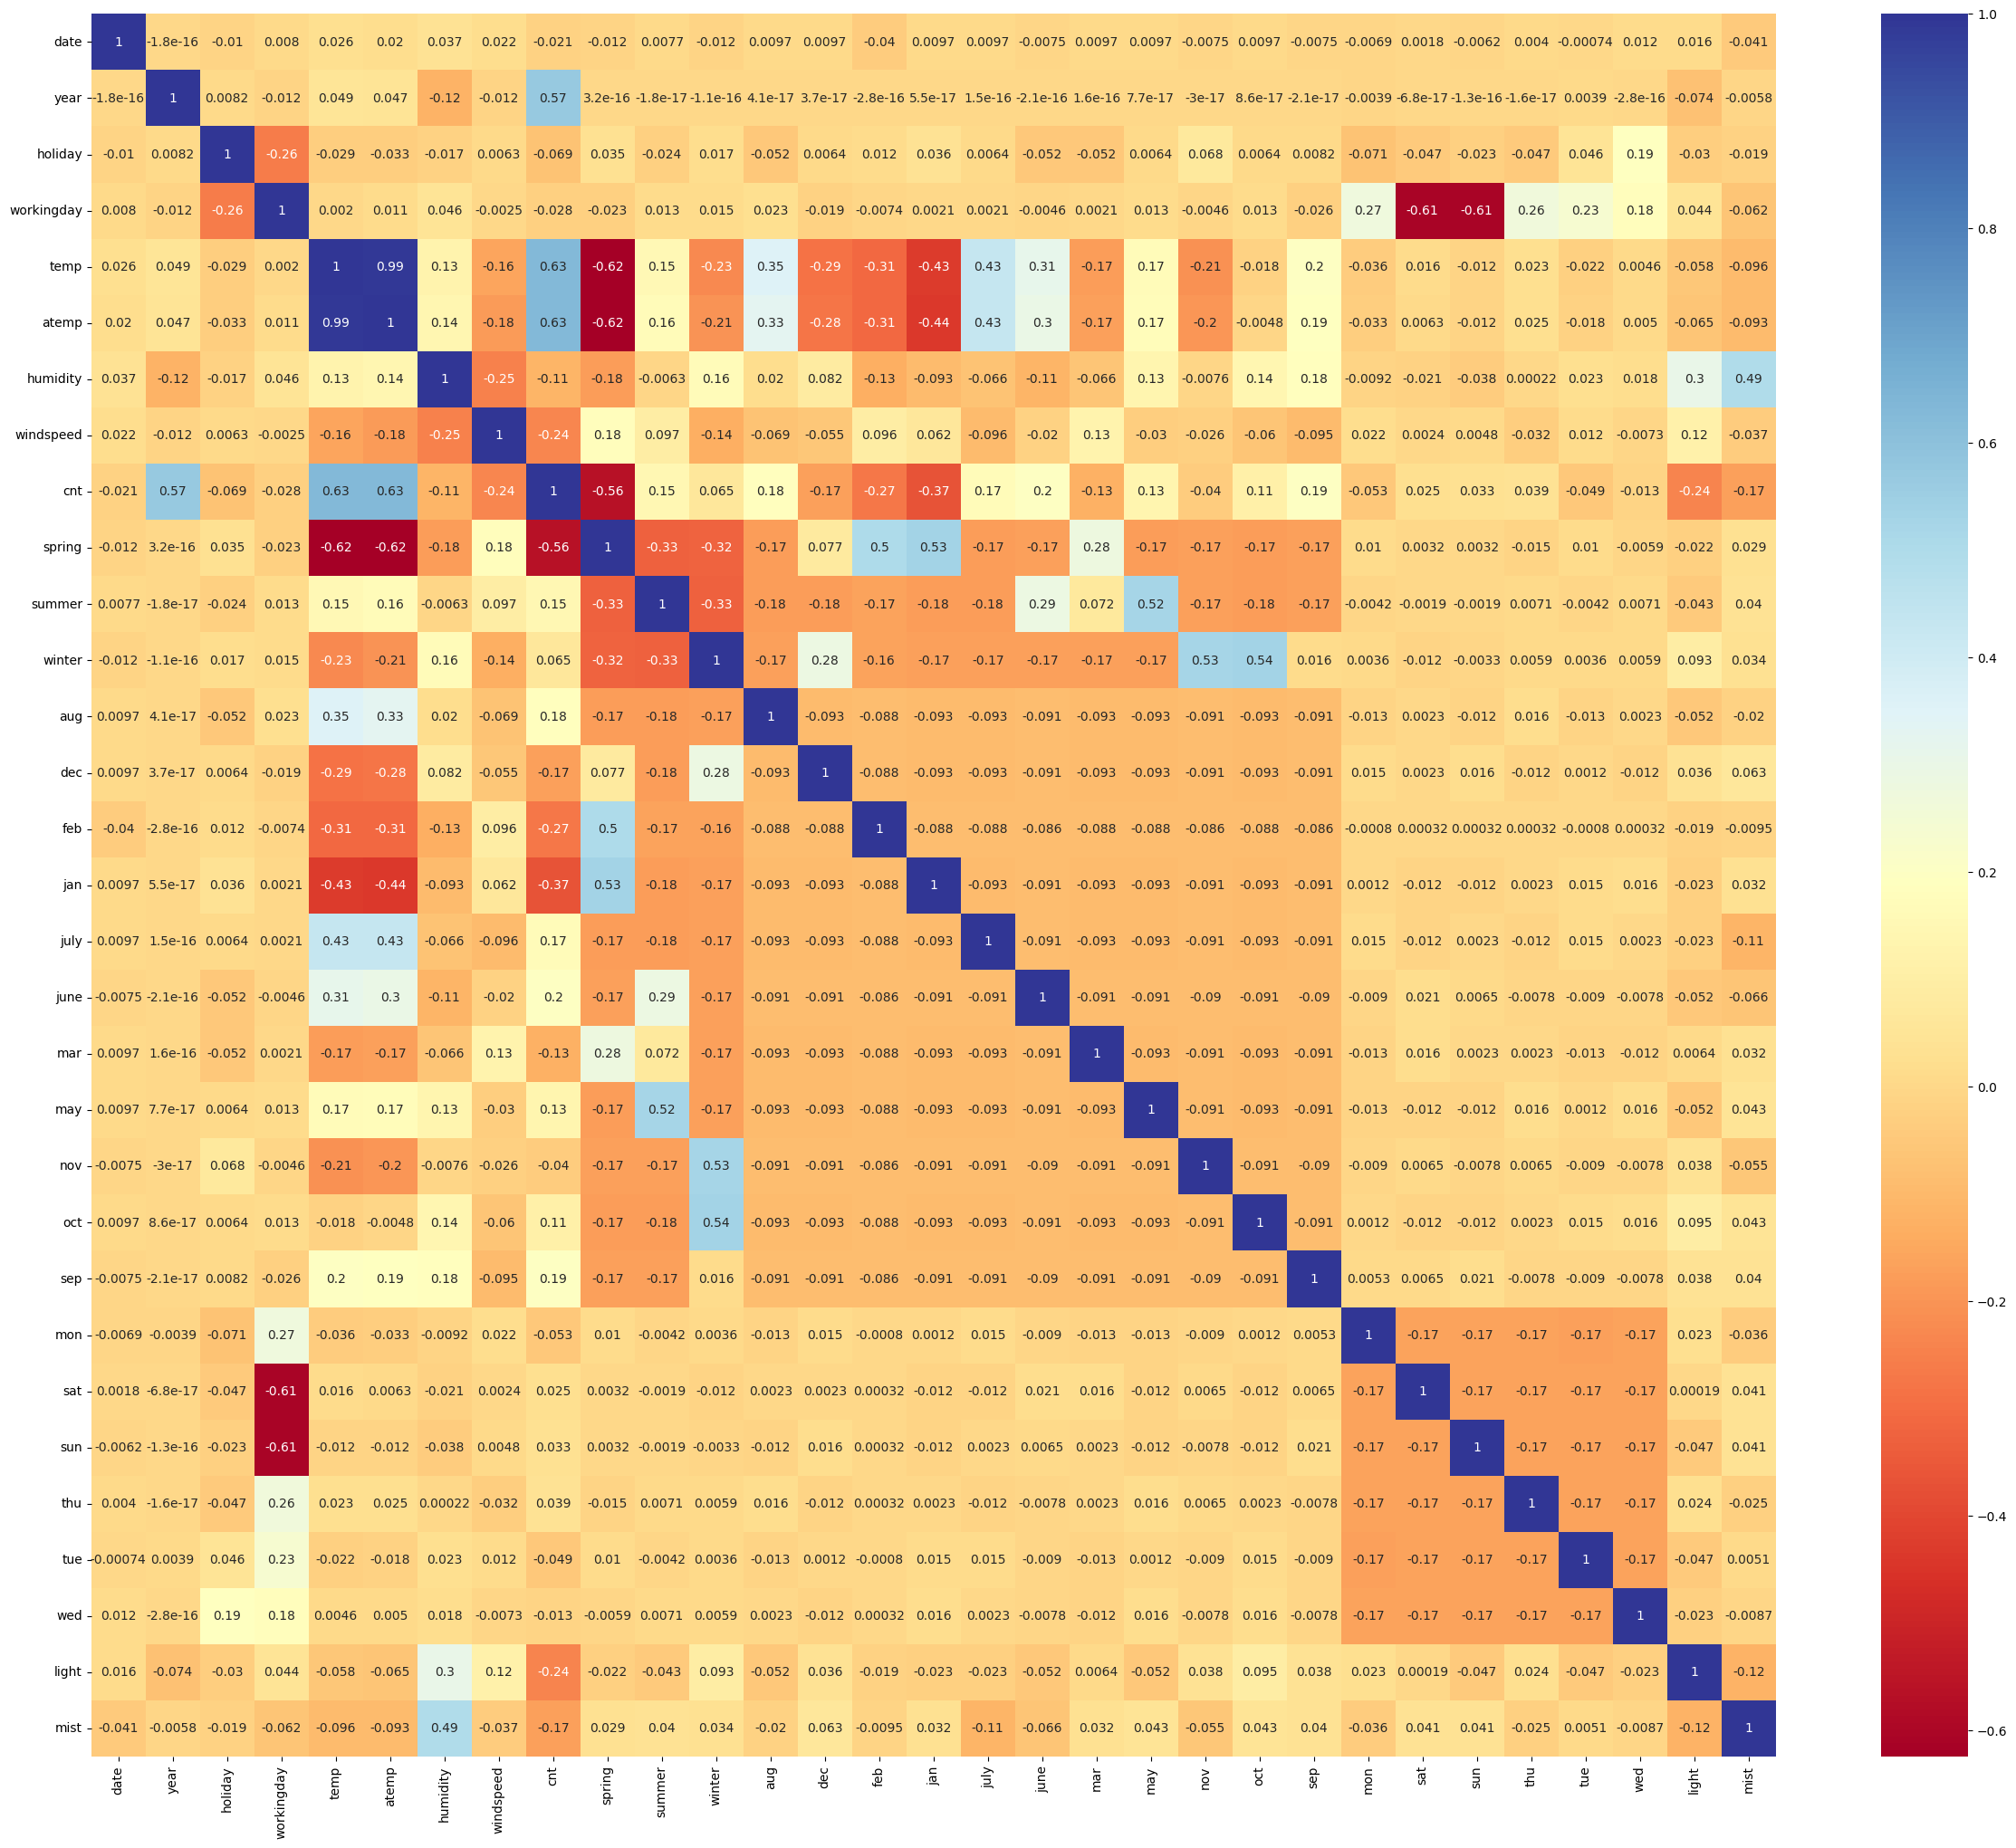

In [48]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr() , annot = True, cmap='RdYlBu')
plt.show()

From the above correlation, we can observe that:
1. Target variable 'cnt' shows good corelation with temp, atemp , yr. While there is a good negative corelation with spring also.
2. Target variable 'cnt' also show good coreation with jan, feb and light variables.

#### Selecting the Top 15 variables through RFE method

##### RFE method

In [49]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

##### zipping the columns with ranking 

In [50]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('date', False, 16),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', False, 14),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 12),
 ('tue', False, 8),
 ('wed', False, 11),
 ('light', True, 1),
 ('mist', True, 1)]

##### Selecting RFE columns

In [51]:
column = X_train.columns[rfe.support_]
column

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'winter',
       'dec', 'feb', 'jan', 'july', 'nov', 'sep', 'light', 'mist'],
      dtype='object')

# 5. Building the Linear Model

#####  We are assuming significance level of 0.05.

#### First Model

In [52]:
X_train_RFE = X_train[column]

In [53]:
X_train_lm_1 = sm.add_constant(X_train_RFE)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.30e-188
Time:                        14:24:16   Log-Likelihood:                 513.31
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3509      0.028     12.320      0.0

##### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

##### $ VIF_i = \frac{1}{1 - {R_i}^2} $

##### Create a function to calculate VIF 

In [54]:
def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values ,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

##### We need to bring all VIFs below 5 to avoid multicollinearity issue.

##### Calculate VIF

In [55]:
calculate_VIF(X_train_RFE)

,feature,VIF
3,humidity,18.50
2,temp,14.23
4,windspeed,4.07
5,spring,4.04
6,winter,2.90
14,mist,2.44
9,jan,2.29
0,year,2.08
8,feb,1.89
11,nov,1.83


##### Humidity has very high VIF, which can be dropped

In [56]:
X_train_new = X_train_RFE.drop(['humidity'], axis = 1)

#### Second Model

In [57]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.00e-186
Time:                        14:24:16   Log-Likelihood:                 505.36
No. Observations:                 510   AIC:                            -980.7
Df Residuals:                     495   BIC:                            -917.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2999      0.026     11.637      0.0

##### Calculate VIF

In [58]:
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.71
3,windspeed,4.06
4,spring,3.76
5,winter,2.58
8,jan,2.20
0,year,2.07
7,feb,1.88
10,nov,1.81
6,dec,1.55
13,mist,1.53


##### The model seems to be good as all the VIF values are less than 5. We can build better model from this

##### February seems to have high P-Value. We can drop it and model it again

In [59]:
X_train_new = X_train_new.drop(['feb'], axis = 1)

#### Third Model

In [60]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.08e-186
Time:                        14:24:16   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.025     11.427      0.0

##### Calculate VIF 

In [61]:
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,year,2.06
9,nov,1.80
7,jan,1.65
12,mist,1.53
6,dec,1.46
8,july,1.36


##### November seems to have high P-Value. We can drop it and model it again

In [62]:
X_train_new = X_train_new.drop(['nov'], axis = 1)

#### Fourth Model

In [63]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.02e-186
Time:                        14:24:16   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2769      0.025     11.074      0.0

##### Calculate VIF

In [64]:
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,year,2.06
5,winter,1.64
7,jan,1.64
11,mist,1.53
8,july,1.36
6,dec,1.29
9,sep,1.20


##### December shows high P-value. We can drop it and build the model again

In [65]:
X_train_new = X_train_new.drop(['dec'], axis = 1)

#### Fifth Model

In [66]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.13e-186
Time:                        14:24:16   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2657      0.025     10.843      0.0

##### Calculate VIF

In [67]:
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,year,2.06
6,jan,1.60
10,mist,1.53
5,winter,1.40
7,july,1.36
8,sep,1.20
9,light,1.08


##### January has high P-value. We can drop it and build the model again

In [68]:
X_train_new = X_train_new.drop(['jan'], axis = 1)

#### Sixth Model

In [69]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.16e-186
Time:                        14:24:16   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2519      0.024     10.530      0.0

##### Calculate VIF

In [70]:
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.60
3,windspeed,4.00
0,year,2.06
4,spring,1.65
9,mist,1.51
5,winter,1.40
6,july,1.35
7,sep,1.20
8,light,1.08
1,holiday,1.04


##### We can consider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors, and the p-values for all the predictors is significant.
##### F-Statistics value of 248.7 (which is greater than 1) and the Prob (F-statistic) of 1.16e-186 i.e almost equals to zero, which states that the overall model is significant

##### Checking coefficient parameters

In [71]:
lr_6.params

const        0.251899
year         0.234092
holiday     -0.098556
temp         0.451455
windspeed   -0.139817
spring      -0.110795
winter       0.047278
july        -0.072719
sep          0.057705
light       -0.286408
mist        -0.081133
dtype: float64

# 6. Residual Analysis

#### Calculate the prediction value of y for the lr_6 model

In [72]:
y_train_pred = lr_6.predict(X_train_lm_6)

#### Distribution of error terms

##### Plotting histogram of residual error

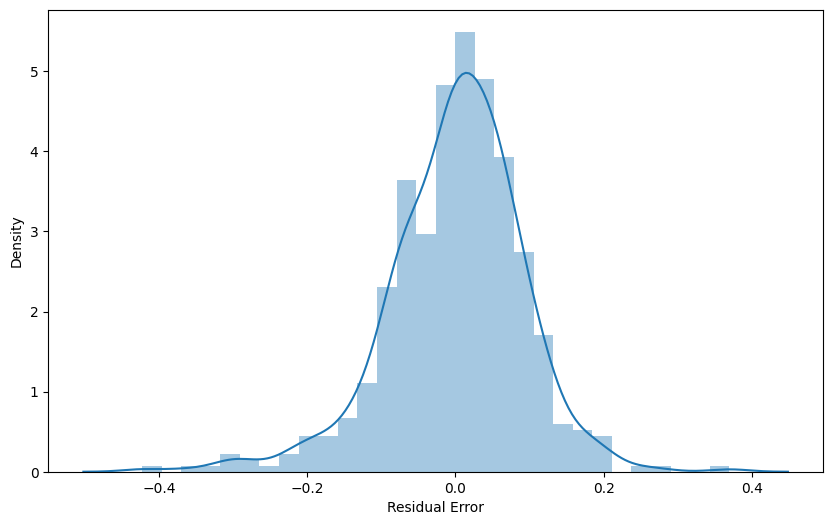

In [73]:
plt.figure(figsize=(10,6))
sns.distplot(y_train - y_train_pred ,bins =30)
plt.xlabel("Residual Error")
plt.show()

##### From the graph, we can infer that errors are normally distributed

#### Homoscedasticity Of Model

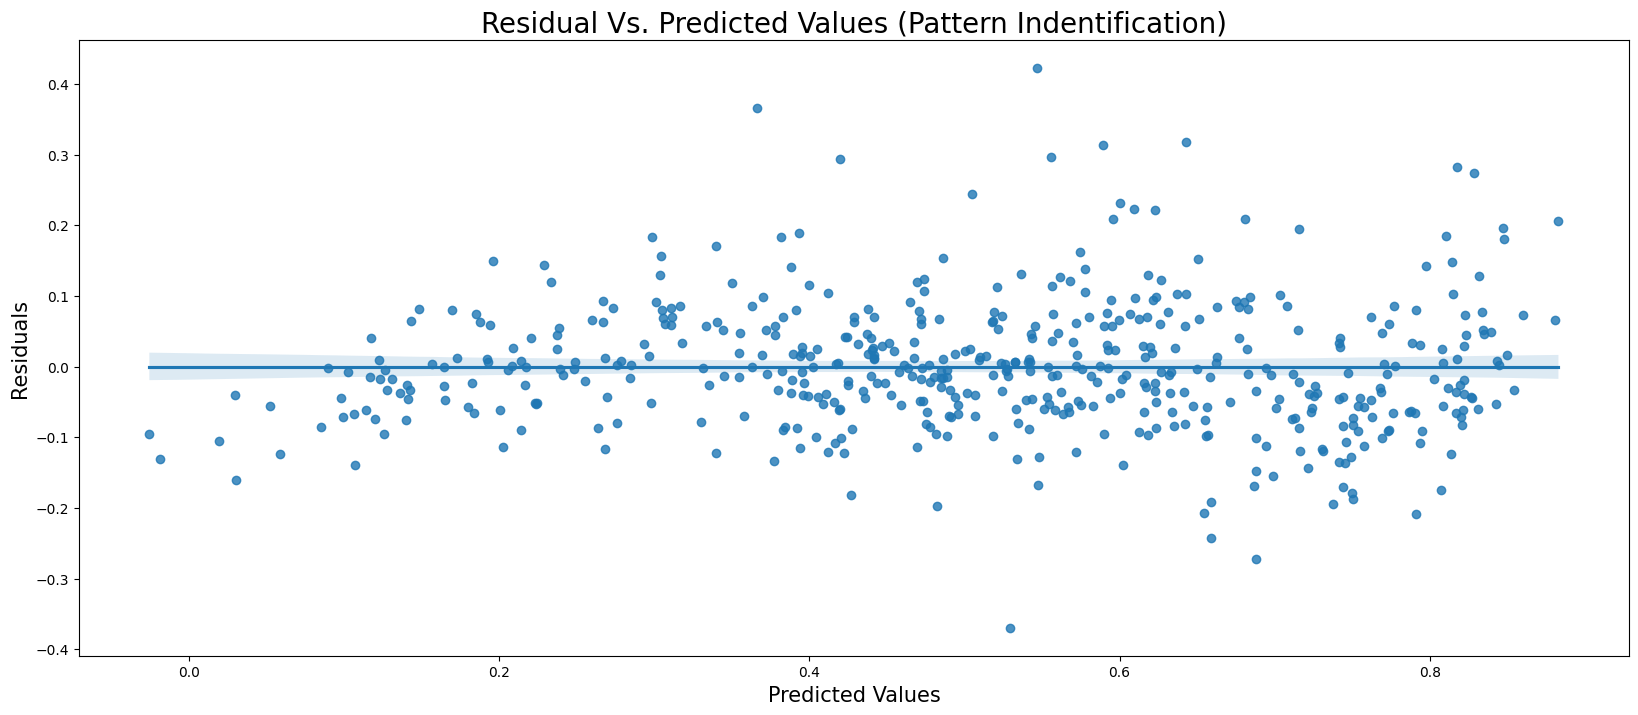

In [74]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
residual = y_train_pred - y_train
sns.regplot(x=y_train_pred, y=residual,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

##### From the above graph, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern. This describes homoscedasticity

#### Multicollinearity between the predictor variables

In [75]:
calculate_VIF(X_train_new)

,feature,VIF
2,temp,4.60
3,windspeed,4.00
0,year,2.06
4,spring,1.65
9,mist,1.51
5,winter,1.40
6,july,1.35
7,sep,1.20
8,light,1.08
1,holiday,1.04


##### From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

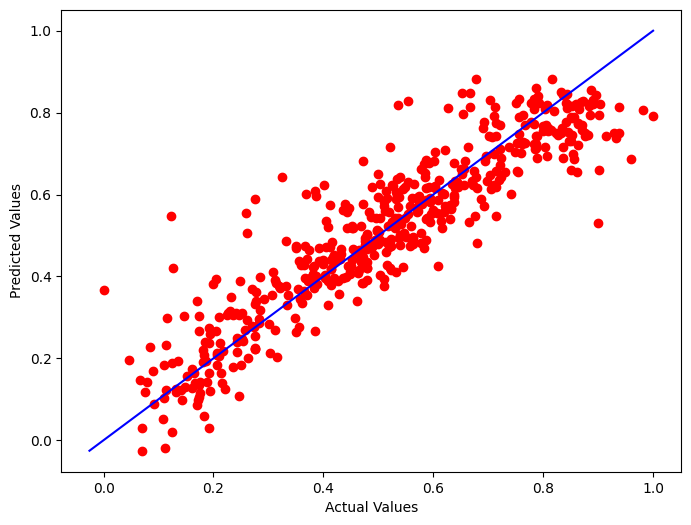

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred, c='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
p1 = max(max(y_train_pred), max(y_train))
p2 = min(min(y_train_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')

##### The actual values and predicted values are showing linear corelation.

# 7. Making final prediction

#### Applying scaling on the test dataset

In [77]:
numerical_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
data_test[numerical_vars] = scaler.transform(data_test[numerical_vars])
data_test.head()

,date,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,...,oct,sep,mon,sat,sun,thu,tue,wed,light,mist
184,4,0,1,0,0.831783,0.769660,0.575080,0.084219,0.692706,0,...,0,0,0,0,0,0,0,1,0,1
535,20,1,0,1,0.901354,0.842587,0.516506,0.153728,0.712034,0,...,0,0,0,0,0,1,0,0,0,0
299,27,0,0,0,0.511964,0.496145,0.798722,0.334206,0.303382,0,...,1,0,0,1,0,0,0,0,0,1
221,10,0,0,1,0.881625,0.795343,0.301917,0.339570,0.547400,0,...,0,0,0,0,0,0,0,0,0,0
152,2,0,0,0,0.817246,0.741471,0.149627,0.537414,0.569029,0,...,0,0,0,1,0,0,0,0,0,0


#### Prepare X and y data for test

In [78]:
y_test = data_test.pop('cnt')
X_test = data_test

In [79]:
columns_test = X_train_new.columns
X_test = X_test[columns_test]
X_test.head()

,year,holiday,temp,windspeed,spring,winter,july,sep,light,mist
184,0,1,0.831783,0.084219,0,0,1,0,0,1
535,1,0,0.901354,0.153728,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0


In [80]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

#### Predicing the values using the final model

In [81]:
X_test_lm_6 = sm.add_constant(X_test)
y_test_pred = lr_6.predict(X_test_lm_6)

#### Checking the r2 score

In [82]:
r2 = r2_score(y_test, y_test_pred) 
print('R2 score: ', r2)

R2 score:  0.8070101019557964


# 8. Evaluating the model

#### Plotting y_test and y_pred to understand the spread

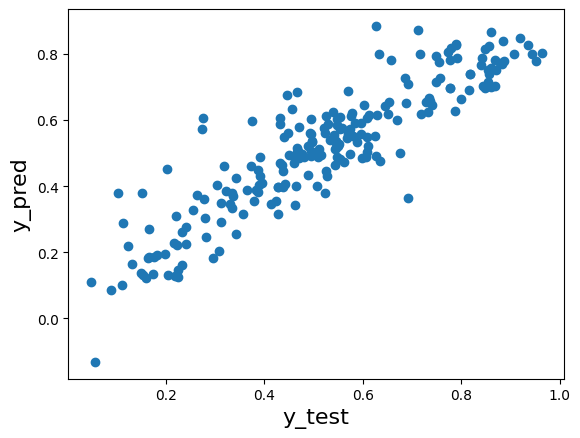

In [83]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [84]:
lr_6.params

const        0.251899
year         0.234092
holiday     -0.098556
temp         0.451455
windspeed   -0.139817
spring      -0.110795
winter       0.047278
july        -0.072719
sep          0.057705
light       -0.286408
mist        -0.081133
dtype: float64

#### Calculating Adjusted R2 value for the test dataset

In [85]:
adjusted_r2 = 1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
print(adjusted_r2)

0.7977317414729019


#### Visualizing the fit of the test data on a regression plot

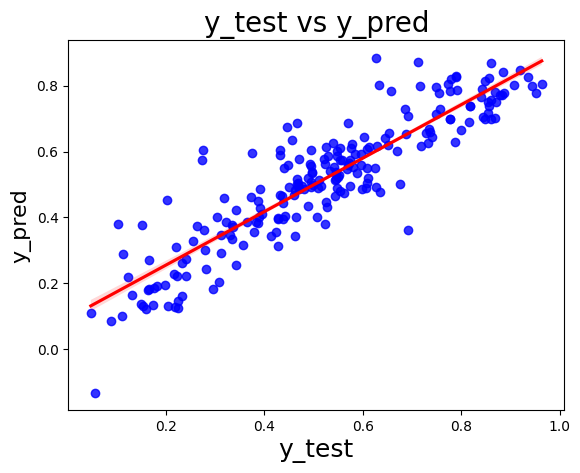

In [86]:
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


##### The model is giving accurate prediction as the graph between test data and predicted data is linear.

# 9. Final Report and Conclusion

In [87]:
lr_6.params

const        0.251899
year         0.234092
holiday     -0.098556
temp         0.451455
windspeed   -0.139817
spring      -0.110795
winter       0.047278
july        -0.072719
sep          0.057705
light       -0.286408
mist        -0.081133
dtype: float64

#### Final Comparision of R^2 and Adjsuted R^2.
- Train R^2 : 0.833 [Train values results are taken from Model-6]
- Train Adjusted R^2 : 0.830 [Train values results are taken from Model-6]
- Test R^2 : 0.807
- Test Adjusted R^2 : 0.797
- This seems to be a decent model that can very well 'Generalize' various datasets.

#### Conclusion
- We can conclude that the model Model-6 fit isn't by chance, and has descent predictive power.
- As per our final Model, the top 3 predictor variables that influences the bike booking are: <b>temp, year, sep</b>
    - A unit increase in temp(Temperature) variable increases the bike hire numbers by 0.451455 units.  
    - A unit increase in sep(September) variable increases the bike hire numbers by 0.057705 units.
    - A unit increase in yr(Year) variable increases the bike hire numbers by 0.234092 units.
- So, it is recommended to consider above variables for planning to achieve maximum demand
- Next variables to be considered are: <b>holiday, windspeed, spring, winter, light, mist</b>

#### Final equation would be:
#### <font color='green'><b><i>cnt (target variable) = 0.251899 + (0.234092 * year) - (0.098556 * holiday) + (0.451455 * temp) - (0.139817 * windspeed) - (0.110795 * spring) + (0.047278 * winter) - (0.072719 * july) + (0.057705 * sep) - (0.286408 * light) - (0.081133 * mist)</i></b></font>